In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from umap import UMAP
import plotly.express as px
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import LabelEncoder

c:\Users\Harry Hyun Woo Choi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
male_players = pd.read_csv('data/male_players.csv')
male_players

C:\Users\Harry Hyun Woo Choi\AppData\Local\Temp\ipykernel_25064\2510204913.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  male_players = pd.read_csv('data/male_players.csv')


player_id                                         player_url  \
0          231747                /player/231747/kylian-mbappe/240002   
1          239085               /player/239085/erling-haaland/240002   
2          192985              /player/192985/kevin-de-bruyne/240002   
3          158023                 /player/158023/lionel-messi/240002   
4          165153                /player/165153/karim-benzema/240002   
...           ...                                                ...   
180016     220806  https://sofifa.com/player/220806/ellis-redman/...   
180017     225509  https://sofifa.com/player/225509/aaron-collins...   
180018     217591  https://sofifa.com/player/217591/piotr-zemlo/1...   
180019     222947  https://sofifa.com/player/222947/tom-davies/15...   
180020     201197  https://sofifa.com/player/201197/paul-tisdale/...   

        fifa_version  fifa_update update_as_of    short_name  \
0               24.0          2.0   2023-09-22     K. Mbappé   
1               24.0          2.0   2023-09-22    E. Haaland   
2               24.0          2.0   2023-09-22  K. De Bruyne   
3               24.0          2.0   2023-09-22      L. Messi   
4               24.0          2.0   2023-09-22    K. Benzema   
...              ...          ...          ...           ...   
180016          15.0          2.0   2014-09-18     E. Redman   
180017          15.0          2.0   2014-09-18    A. Collins   
180018          15.0          2.0   2014-09-18      P. Żemło   
180019          15.0          2.0   2014-09-18     T. Davies   
180020          15.0          2.0   2014-09-18    P. Tisdale   

                             long_name player_positions  overall  potential  \
0                 Kylian Mbappé Lottin           ST, LW       91         94   
1                 Erling Braut Haaland               ST       91         94   
2                      Kevin De Bruyne          CM, CAM       91         91   
3       Lionel Andrés Messi Cuccittini          CF, CAM       90         90   
4                        Karim Benzema           CF, ST       90         90   
...                                ...              ...      ...        ...   
180016                    Ellis Redman               CB       41         61   
180017       Aaron Graham John Collins               ST       41         50   
180018                     Piotr Żemło           LM, LB       40         50   
180019       Thomas Christopher Davies               CB       40         49   
180020                    Paul Tisdale          CM, CAM       40         40   

        ...   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
0       ...  63+3  63+3  63+3  68+3  63+3  54+3  54+3  54+3  63+3  18+3  
1       ...  63+3  63+3  63+3  62+3  60+3  62+3  62+3  62+3  60+3  19+3  
2       ...  80+3  80+3  80+3  79+3  75+3  70+3  70+3  70+3  75+3  21+3  
3       ...  63+3  63+3  63+3  64+3  59+3  49+3  49+3  49+3  59+3  19+3  
4       ...  64+3  64+3  64+3  64+3  60+3  55+3  55+3  55+3  60+3  18+3  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
180016  ...    38    38    38    37    40    41    41    41    40    10  
180017  ...    30    30    30    31    32    31    31    31    32    14  
180018  ...    46    46    46    48  51-1  53-3  53-3  53-3  51-1    12  
180019  ...    36    36    36    37    39    40    40    40    39    13  
180020  ...    37    37    37    36    34    33    33    33    34    10  

[180021 rows x 109 columns]

### EDA

In [3]:
# drop the columns that are unrelevant to our anaylsis
male_players = male_players.drop(['player_url','short_name', 'long_name',
                                  'potential','value_eur','wage_eur','age',
                                  'dob','club_team_id','club_name','league_id',
                                  'league_name','league_level','club_position','club_jersey_number',
                                  'club_loaned_from','club_joined_date','club_contract_valid_until_year',
                                  'nationality_id','nationality_name', 'nation_team_id','nation_position',
                                  'nation_jersey_number','international_reputation','body_type','real_face',
                                  'release_clause_eur','player_tags','player_traits', 'fifa_update', 'goalkeeping_speed',
                                    'shooting', 'passing', 'physic', 'defending', 'dribbling', 'pace', 'mentality_composure'], axis = 1)
male_players

player_id  fifa_version update_as_of player_positions  overall  \
0          231747          24.0   2023-09-22           ST, LW       91   
1          239085          24.0   2023-09-22               ST       91   
2          192985          24.0   2023-09-22          CM, CAM       91   
3          158023          24.0   2023-09-22          CF, CAM       90   
4          165153          24.0   2023-09-22           CF, ST       90   
...           ...           ...          ...              ...      ...   
180016     220806          15.0   2014-09-18               CB       41   
180017     225509          15.0   2014-09-18               ST       41   
180018     217591          15.0   2014-09-18           LM, LB       40   
180019     222947          15.0   2014-09-18               CB       40   
180020     201197          15.0   2014-09-18          CM, CAM       40   

        height_cm  weight_kg preferred_foot  weak_foot  skill_moves  ...  \
0             182         75          Right          4            5  ...   
1             195         94           Left          3            3  ...   
2             181         75          Right          5            4  ...   
3             169         67           Left          4            4  ...   
4             185         81          Right          4            4  ...   
...           ...        ...            ...        ...          ...  ...   
180016        187         81          Right          2            2  ...   
180017        178         57          Right          3            3  ...   
180018        190         76           Left          3            2  ...   
180019        180         70          Right          2            2  ...   
180020        175         72          Right          3            2  ...   

         ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
0       63+3  63+3  63+3  68+3  63+3  54+3  54+3  54+3  63+3  18+3  
1       63+3  63+3  63+3  62+3  60+3  62+3  62+3  62+3  60+3  19+3  
2       80+3  80+3  80+3  79+3  75+3  70+3  70+3  70+3  75+3  21+3  
3       63+3  63+3  63+3  64+3  59+3  49+3  49+3  49+3  59+3  19+3  
4       64+3  64+3  64+3  64+3  60+3  55+3  55+3  55+3  60+3  18+3  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
180016    38    38    38    37    40    41    41    41    40    10  
180017    30    30    30    31    32    31    31    31    32    14  
180018    46    46    46    48  51-1  53-3  53-3  53-3  51-1    12  
180019    36    36    36    37    39    40    40    40    39    13  
180020    37    37    37    36    34    33    33    33    34    10  

[180021 rows x 71 columns]

In [4]:
pd.set_option('display.max_rows', 10)
male_players_24 = male_players[male_players['fifa_version'] == 24.0]
male_players_24 

player_id  fifa_version update_as_of player_positions  overall  \
0         231747          24.0   2023-09-22           ST, LW       91   
1         239085          24.0   2023-09-22               ST       91   
2         192985          24.0   2023-09-22          CM, CAM       91   
3         158023          24.0   2023-09-22          CF, CAM       90   
4         165153          24.0   2023-09-22           CF, ST       90   
...          ...           ...          ...              ...      ...   
18345     273759          24.0   2023-09-22               CB       47   
18346     269013          24.0   2023-09-22               CB       47   
18347     272748          24.0   2023-09-22               ST       47   
18348     269534          24.0   2023-09-22               CM       47   
18349     269541          24.0   2023-09-22              CDM       47   

       height_cm  weight_kg preferred_foot  weak_foot  skill_moves  ...   ldm  \
0            182         75          Right          4            5  ...  63+3   
1            195         94           Left          3            3  ...  63+3   
2            181         75          Right          5            4  ...  80+3   
3            169         67           Left          4            4  ...  63+3   
4            185         81          Right          4            4  ...  64+3   
...          ...        ...            ...        ...          ...  ...   ...   
18345        176         76           Left          3            2  ...  39+2   
18346        183         74          Right          3            2  ...  43+2   
18347        184         65          Right          2            2  ...  31+2   
18348        178         74          Right          3            2  ...  45+2   
18349        182         75          Right          3            2  ...  46+2   

        cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
0      63+3  63+3  68+3  63+3  54+3  54+3  54+3  63+3  18+3  
1      63+3  63+3  62+3  60+3  62+3  62+3  62+3  60+3  19+3  
2      80+3  80+3  79+3  75+3  70+3  70+3  70+3  75+3  21+3  
3      63+3  63+3  64+3  59+3  49+3  49+3  49+3  59+3  19+3  
4      64+3  64+3  64+3  60+3  55+3  55+3  55+3  60+3  18+3  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
18345  39+2  39+2  41+2  43+2  47+2  47+2  47+2  43+2  13+2  
18346  43+2  43+2  44+2  46+2  47+2  47+2  47+2  46+2  13+2  
18347  31+2  31+2  35+2  33+2  27+2  27+2  27+2  33+2  13+2  
18348  45+2  45+2  45+2  45+2  44+2  44+2  44+2  45+2  14+2  
18349  46+2  46+2  46+2  46+2  46+2  46+2  46+2  46+2  14+2  

[18350 rows x 71 columns]

In [5]:
# check if any na values still remain
missing = male_players.isna().sum()
missing.sort_values(ascending= False)

player_id                0
st                       0
rw                       0
rf                       0
cf                       0
                        ..
movement_agility         0
movement_sprint_speed    0
movement_acceleration    0
skill_ball_control       0
gk                       0
Length: 71, dtype: int64

In [6]:
# define broad categories
defender_positions = {'CB', 'LB', 'RB', 'LWB', 'RWB', 'DB'}
midfielder_positions = {'CM', 'CAM', 'CDM', 'LM', 'RM'}
forward_positions = {'CF', 'ST', 'LW', 'RW'}
goalkeeper_position = {'GK'}

In [7]:
def generalize_position(position):
    positions = position.replace(' ', '').split(',')
    for pos in positions:
        if pos in goalkeeper_position:
            return 'GK'
        elif pos in defender_positions:
            return 'D'
        elif pos in midfielder_positions:
            return 'M'
        elif pos in forward_positions:
            return 'F'
    return 'Unknown'

In [8]:
# Apply function to player positions
male_players_24['broad_position'] = male_players_24['player_positions'].apply(generalize_position)

male_players_24['broad_position'].unique()

C:\Users\Harry Hyun Woo Choi\AppData\Local\Temp\ipykernel_25064\1509442758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_players_24['broad_position'] = male_players_24['player_positions'].apply(generalize_position)


array(['F', 'M', 'GK', 'D'], dtype=object)

In [9]:
male_players_24.dtypes[::-1][:10]

broad_position    object
gk                object
rb                object
rcb               object
cb                object
lcb               object
lb                object
rwb               object
rdm               object
cdm               object
dtype: object

In [10]:
# remove + or - symbols in player's stats
male_players_24 = male_players_24.copy()

def remove_symbols_and_convert_int(value):
    value = str(value)
    if pd.isna(value):
        return np.nan
    # split the string at '+' or '-' and convert to integer
    for char in ['+', '-']:
        if char in value:
            return int(value.split(char)[0])
    # if neither '+' nor '-' is in the value, just convert it to integer
    return int(value)

columns_to_process = ['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk']

for column in columns_to_process:
    male_players_24.loc[:, column] = male_players_24[column].apply(remove_symbols_and_convert_int)

male_players_24

player_id  fifa_version update_as_of player_positions  overall  \
0         231747          24.0   2023-09-22           ST, LW       91   
1         239085          24.0   2023-09-22               ST       91   
2         192985          24.0   2023-09-22          CM, CAM       91   
3         158023          24.0   2023-09-22          CF, CAM       90   
4         165153          24.0   2023-09-22           CF, ST       90   
...          ...           ...          ...              ...      ...   
18345     273759          24.0   2023-09-22               CB       47   
18346     269013          24.0   2023-09-22               CB       47   
18347     272748          24.0   2023-09-22               ST       47   
18348     269534          24.0   2023-09-22               CM       47   
18349     269541          24.0   2023-09-22              CDM       47   

       height_cm  weight_kg preferred_foot  weak_foot  skill_moves  ... cdm  \
0            182         75          Right          4            5  ...  63   
1            195         94           Left          3            3  ...  63   
2            181         75          Right          5            4  ...  80   
3            169         67           Left          4            4  ...  63   
4            185         81          Right          4            4  ...  64   
...          ...        ...            ...        ...          ...  ...  ..   
18345        176         76           Left          3            2  ...  39   
18346        183         74          Right          3            2  ...  43   
18347        184         65          Right          2            2  ...  31   
18348        178         74          Right          3            2  ...  45   
18349        182         75          Right          3            2  ...  46   

       rdm  rwb  lb  lcb  cb  rcb  rb  gk  broad_position  
0       63   68  63   54  54   54  63  18               F  
1       63   62  60   62  62   62  60  19               F  
2       80   79  75   70  70   70  75  21               M  
3       63   64  59   49  49   49  59  19               F  
4       64   64  60   55  55   55  60  18               F  
...    ...  ...  ..  ...  ..  ...  ..  ..             ...  
18345   39   41  43   47  47   47  43  13               D  
18346   43   44  46   47  47   47  46  13               D  
18347   31   35  33   27  27   27  33  13               F  
18348   45   45  45   44  44   44  45  14               M  
18349   46   46  46   46  46   46  46  14               M  

[18350 rows x 72 columns]

In [11]:
# number of players in each position's
male_players_24.groupby('broad_position')['player_id'].count()

broad_position
D     6174
F     3458
GK    2045
M     6673
Name: player_id, dtype: int64

In [12]:
attributes=['lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram']

# Melting the DataFrame to have attribute names in a single column and their values in another
melted_df = male_players_24.melt(id_vars=['broad_position'], value_vars=attributes, var_name='Attribute', value_name='Value')
melted_df

broad_position Attribute Value
0                   F        lw    91
1                   F        lw    82
2                   M        lw    87
3                   F        lw    90
4                   F        lw    86
...               ...       ...   ...
146795              D       ram    28
146796              D       ram    33
146797              F       ram    45
146798              M       ram    47
146799              M       ram    43

[146800 rows x 3 columns]

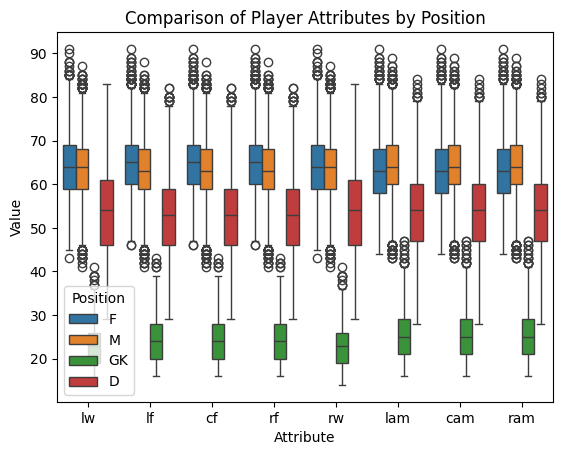

In [13]:
# boxplot of each position's attributes
sns.boxplot(data=melted_df, x='Attribute', y='Value', hue='broad_position')
plt.title('Comparison of Player Attributes by Position')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.legend(title='Position')
plt.show()

In [14]:
# correlation matrix
corr_matrix = male_players_24[attributes].corr()
corr_matrix

lw        lf        cf        rf        rw       lam       cam  \
lw   1.000000  0.994407  0.994407  0.994407  1.000000  0.992693  0.992693   
lf   0.994407  1.000000  1.000000  1.000000  0.994407  0.994642  0.994642   
cf   0.994407  1.000000  1.000000  1.000000  0.994407  0.994642  0.994642   
rf   0.994407  1.000000  1.000000  1.000000  0.994407  0.994642  0.994642   
rw   1.000000  0.994407  0.994407  0.994407  1.000000  0.992693  0.992693   
lam  0.992693  0.994642  0.994642  0.994642  0.992693  1.000000  1.000000   
cam  0.992693  0.994642  0.994642  0.994642  0.992693  1.000000  1.000000   
ram  0.992693  0.994642  0.994642  0.994642  0.992693  1.000000  1.000000   

          ram  
lw   0.992693  
lf   0.994642  
cf   0.994642  
rf   0.994642  
rw   0.992693  
lam  1.000000  
cam  1.000000  
ram  1.000000

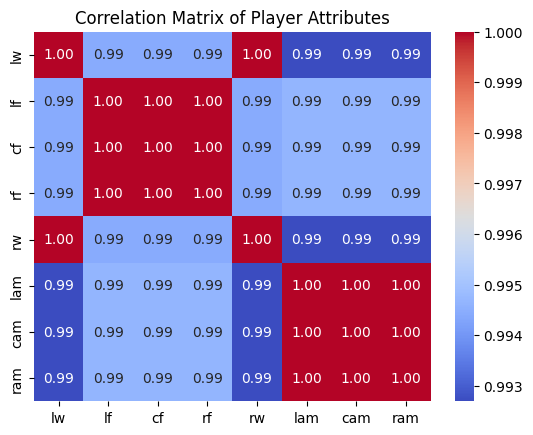

In [15]:
# heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm') # square=True, linewidths=.5, cbar_kws={"shrink": .5}
plt.title('Correlation Matrix of Player Attributes')
plt.show()

---
## Harry's part

### Dimensionality Reduction

In [16]:
#here are the relevant features that we will use in our clustering
keeping_features = [
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision',
        'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk']

X = male_players_24[keeping_features]

# compare the ground truth for metrics
true_labels = male_players_24['broad_position']

In [17]:
# check the range to see if we need standardization
min_value = X.min().min()
max_value = X.max().max()

print("Minimum value in X:", min_value)
print("Maximum value in X:", max_value)

Minimum value in X: 2
Maximum value in X: 97


In [18]:
# we don't need to standardize the values since the range is 0-100
# X_scaled = StandardScaler().fit_transform(X)
# X_scaled is not scaled actually
X_scaled = X.copy()

### PCA

In [19]:
pca = PCA(n_components=0.90) # setting threshold to 90%
X_pca = pca.fit_transform(X_scaled)

In [20]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained by all selected components:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.67850301 0.16480112 0.04595538 0.03210933]
Total variance explained by all selected components: 0.9213688512713295


The explained variance ratio is a metric that tells you how much of the total variance in your dataset is captured by each principal component generated by PCA (Principal Component Analysis). Specifically, it indicates the proportion of the dataset's variance that lies along each principal component axis.

The first principal component captures approximately 67.85% of the variance in the dataset, second principal component, 0.16%, and so on. This means that a significant portion of the information (or variability) in your dataset can be represented along this first principal component dimension.

Text(0.5, 1.0, 'PCA Projection - First Two Principal Components')

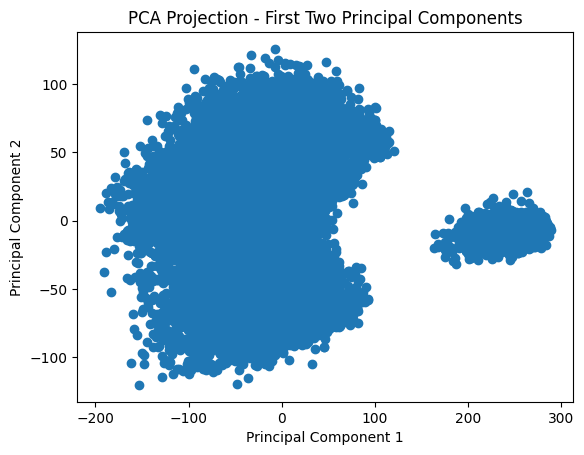

In [21]:
# scatter plot the pc1 and pc2
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection - First Two Principal Components')

Text(0, 0.5, 'PC 2')

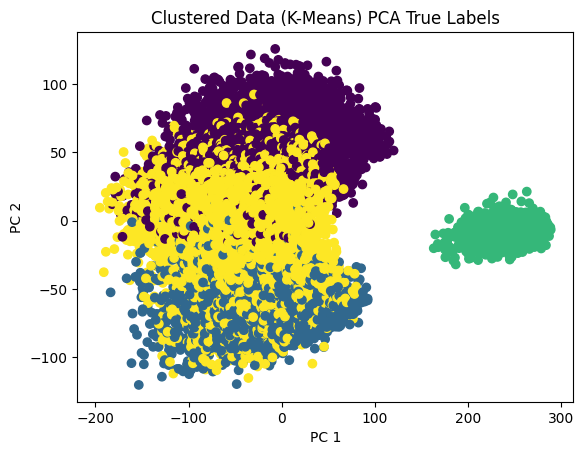

In [22]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(true_labels)

# true label for pca scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_encoded)
plt.title('Clustered Data (K-Means) PCA True Labels')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [30]:
fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=true_labels,  # This automatically assigns colors based on the unique values in true_labels
    title='3D PCA Projection of the Dataset (Colored by True Labels)'
)

fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()

The above scatter plot is not enough to do the dimensionality reduction for 4 ground truth positions.  We can only observe 2 clusters and the small cluster will be goal keeper and the big cluster most likely contain the other 3 positions.

Now do another dimensionality reduction approach.

In [56]:
# PCA to 4 and 5 dimensions
pca_4 = PCA(n_components=4).fit_transform(X)
pca_5 = PCA(n_components=5).fit_transform(X)

### UMAP

In [23]:
umap = UMAP(n_neighbors=10, min_dist=0.99, n_components=2) # find the right parameter

# Fit UMAP and transform your data
X_umap = umap.fit_transform(X_scaled)

Text(0, 0.5, 'UMAP Component 2')

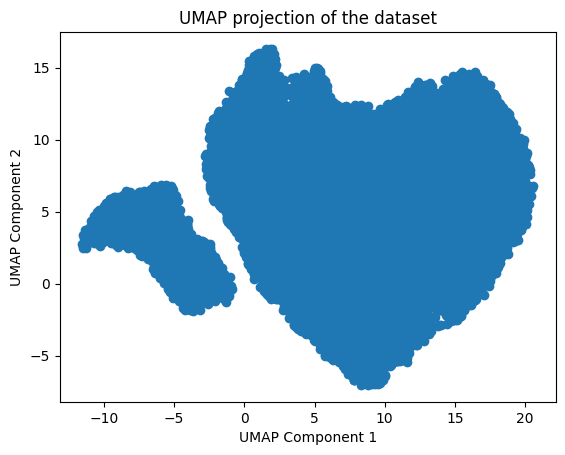

In [24]:
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

Text(0, 0.5, 'Component 2')

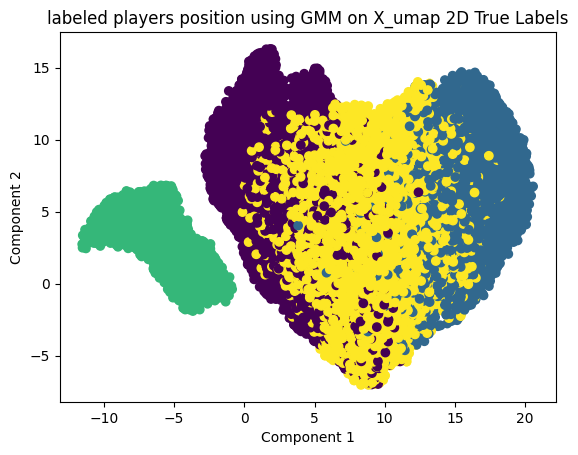

In [29]:
# True labels 2D GMMs
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_encoded)
plt.title('labeled players position using GMM on X_umap 2D True Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

Since trying with multiple parameters doesn't separate the exact 4 clusters, try the 3d versions with n_components=3

In [31]:
umap_3d = UMAP(n_neighbors=10, min_dist=0.99, n_components=3) # # find the right parameter

# Fit UMAP and transform your data
X_umap_3d = umap_3d.fit_transform(X_scaled)

In [32]:
fig = px.scatter_3d(
    x=X_umap_3d[:, 0],
    y=X_umap_3d[:, 1],
    z=X_umap_3d[:, 2],
    title='3D UMAP projection of the dataset'
)

fig.update_layout(
    scene=dict(
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        zaxis_title='UMAP Component 3'
    )
)

In [33]:
# plot the true label in 3d
fig = px.scatter_3d(
    x=X_umap_3d[:, 0],
    y=X_umap_3d[:, 1],
    z=X_umap_3d[:, 2],
    color=true_labels,
    title='3D UMAP Projection of the Dataset (Colored by True Labels)'
)

fig.update_layout(
    scene=dict(
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        zaxis_title='UMAP Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

In [57]:
# UMAP to 4 and 5 dimensions
umap_4 = UMAP(n_components=4, random_state=42).fit_transform(X)
umap_5 = UMAP(n_components=5, random_state=42).fit_transform(X)

c:\Users\Harry Hyun Woo Choi\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\Harry Hyun Woo Choi\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



### t-SNE

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)  # Setting random_state for reproducibility
X_tsne = tsne.fit_transform(X)

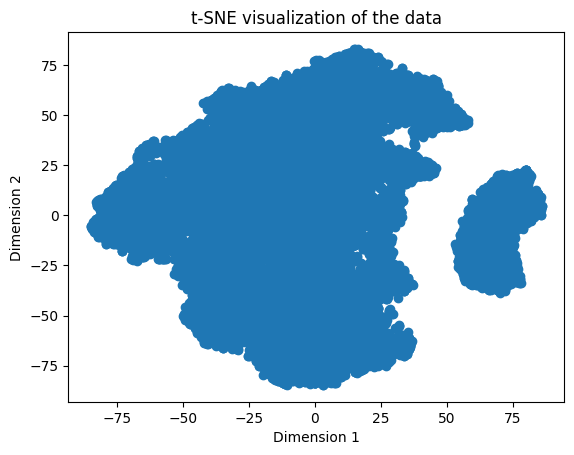

In [36]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])  # Plotting the two dimensions
plt.title('t-SNE visualization of the data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [37]:
tsne3d = TSNE(n_components=3, random_state=42)  # Setting random_state for reproducibility
X_tsne_3d = tsne3d.fit_transform(X)

In [38]:
fig = px.scatter_3d(
    x=X_tsne_3d[:, 0],
    y=X_tsne_3d[:, 1],
    z=X_tsne_3d[:, 2],
     color=true_labels,
    title='3D t-SNE projection of the dataset'
)

fig.update_layout(
    scene=dict(
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        zaxis_title='UMAP Component 3'
    )
)

## Clustering from here

### K means


In [39]:
kmeans = KMeans(n_clusters=4)
cluster_labels_k_umap = kmeans.fit_predict(X_umap)
cluster_labels_k_umap

array([1, 1, 1, ..., 0, 3, 3])

In [40]:
kmeans = KMeans(n_clusters=4)
cluster_labels_k_pca = kmeans.fit_predict(X_pca)
cluster_labels_k_pca

array([0, 0, 0, ..., 2, 3, 3])

Text(0, 0.5, 'PC 2')

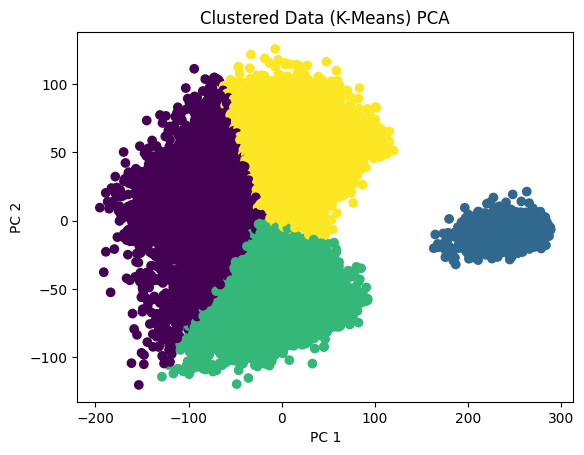

In [41]:
# scatter plot of the predicted clustered using k means using pca structure
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_k_pca)
plt.title('Clustered Data (K-Means) PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [42]:
# calculate metrics 
silhouette_avg_k_pca = silhouette_score(X_pca, cluster_labels_k_pca)
print(f'Silhouette Score K means using PCA dataset: {silhouette_avg_k_pca:.2f}')
ari_k = adjusted_rand_score(true_labels, cluster_labels_k_pca)
print(f'Adjusted Rand Index: {ari_k:.2f}')

Silhouette Score K means using PCA dataset: 0.43
Adjusted Rand Index: 0.38


Text(0, 0.5, 'Component 2')

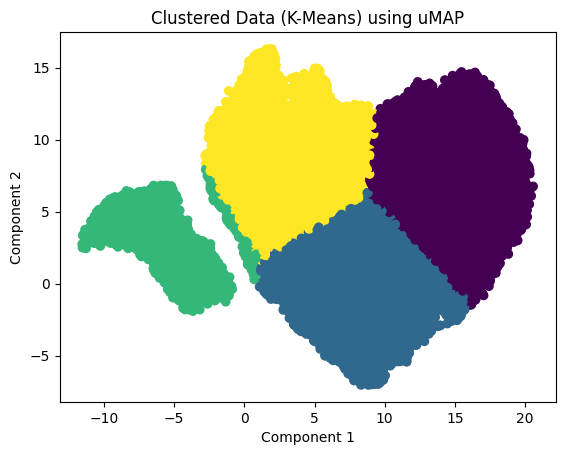

In [43]:
# using X_umap scatter plot of the predicted k-means clustered
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels_k_umap)
plt.title('Clustered Data (K-Means) using uMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [44]:
# calculate metrics 
silhouette_avg_umap = silhouette_score(X_umap, cluster_labels_k_umap)
print(f'Silhouette Score K means using UMAP dataset: {silhouette_avg_umap:.2f}')
ari_k = adjusted_rand_score(true_labels, cluster_labels_k_umap)
print(f'Adjusted Rand Index: {ari_k:.2f}')

Silhouette Score K means using UMAP dataset: 0.43
Adjusted Rand Index: 0.38


In [62]:
kmeans_4d = KMeans(n_clusters=4, random_state=42)  # Adjust the number_of_clusters as needed
labels_4d_pca = kmeans_4d.fit_predict(pca_4)
labels_4d_umap = kmeans_4d.fit_predict(umap_4)

# Calculate ARI
ari_4d_pca = adjusted_rand_score(true_labels, labels_4d_pca)
print(f"ARI for 4-dimensional PCA with KMeans: {ari_4d_pca}")

ari_4d_umap = adjusted_rand_score(true_labels, labels_4d_umap)
print(f"ARI for 4-dimensional u-MAP with KMeans: {ari_4d_umap}")

kmeans_5d = KMeans(n_clusters=4, random_state=42)  # Adjust the number_of_clusters as needed
labels_5d_pca = kmeans_5d.fit_predict(pca_5)
labels_5d_umap = kmeans_5d.fit_predict(umap_5)

# Calculate ARI
ari_5d_pca = adjusted_rand_score(true_labels, labels_5d_pca)
print(f"ARI for 5-dimensional PCA with KMeans: {ari_5d_pca}")

ari_5d_umap = adjusted_rand_score(true_labels, labels_5d_umap)
print(f"ARI for 5-dimensional u-MAP with KMeans: {ari_5d_umap}")

ARI for 4-dimensional PCA with KMeans: 0.3753531534181046
ARI for 4-dimensional u-MAP with KMeans: 0.3948726338599669
ARI for 5-dimensional PCA with KMeans: 0.3759845561944448
ARI for 5-dimensional u-MAP with KMeans: 0.3943921282962195


### Gaussian Mixture Model

In [45]:
# Grid Search
# could implement cross validation here
param_grid = {
    'n_components': [4], 
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'tol': [0.001, 0.01], 
    'n_init': [1,2],
    'init_params': ['kmeans', 'random'], 
}

best_ari_2d = -1
best_ari_3d = -1
best_params_2d = {}
best_params_3d = {}

for params in ParameterGrid(param_grid):
    gmm = GaussianMixture(random_state=42, **params)
    labels_2d = gmm.fit_predict(X_umap)
    labels_3d = gmm.fit_predict(X_umap_3d)
    ari_2d = adjusted_rand_score(true_labels, labels_2d)  # Assuming true_labels are available
    ari_3d = adjusted_rand_score(true_labels, labels_3d)  # Assuming true_labels are available

    if ari_2d > best_ari_2d:
        best_ari_2d = ari_2d
        best_params_2d = params
    
    if ari_3d > best_ari_3d:
        best_ari_3d = ari_3d
        best_params_3d = params

print("Best Parameters 2d:", best_params_2d)
print("Best Parameters 3d:", best_params_3d)

Best Parameters 2d: {'covariance_type': 'diag', 'init_params': 'kmeans', 'n_components': 4, 'n_init': 1, 'tol': 0.001}
Best Parameters 3d: {'covariance_type': 'full', 'init_params': 'kmeans', 'n_components': 4, 'n_init': 1, 'tol': 0.001}


In [46]:
gmm = GaussianMixture(**best_params_2d)
cluster_labels_gmm_pca = gmm.fit_predict(X_pca)
cluster_labels_gmm_pca

array([3, 3, 3, ..., 1, 0, 0], dtype=int64)

Text(0, 0.5, 'Component 2')

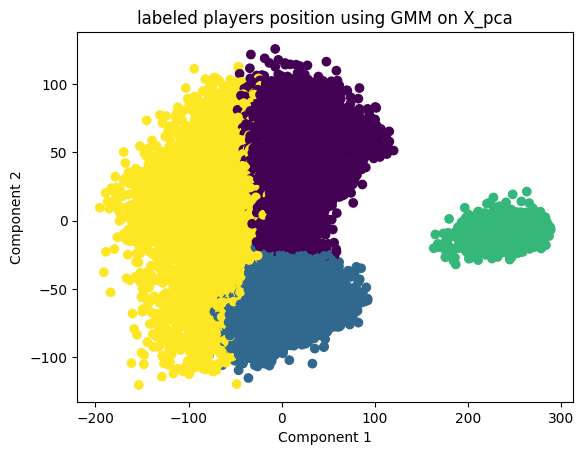

In [47]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_gmm_pca)
plt.title('labeled players position using GMM on X_pca')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [49]:
# calculate metrics 
silhouette_avg_gmm_pca = silhouette_score(X_pca, cluster_labels_gmm_pca)
print(f'Silhouette Score (GMM) using X_pca: {silhouette_avg_gmm_pca:.2f}')

ari_gmm = adjusted_rand_score(true_labels, cluster_labels_gmm_pca)
print(f'Adjusted Rand Index (GMM): {ari_gmm:.2f}')

Silhouette Score (GMM) using X_pca: 0.41
Adjusted Rand Index (GMM): 0.35


In [50]:
gmm = GaussianMixture(**best_params_2d)
cluster_labels_gmm_umap = gmm.fit_predict(X_umap)
cluster_labels_gmm_umap

array([0, 0, 2, ..., 0, 1, 1], dtype=int64)

Text(0, 0.5, 'Component 2')

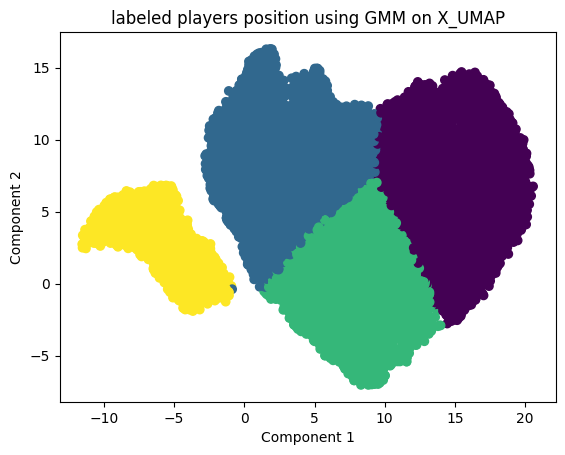

In [51]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels_gmm_umap)
plt.title('labeled players position using GMM on X_UMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [52]:
# calculate metrics 
silhouette_avg_gmm = silhouette_score(X_umap, cluster_labels_gmm_umap)
print(f'Silhouette Score (GMM) using X_umap: {silhouette_avg_gmm:.2f}')

ari_gmm = adjusted_rand_score(true_labels, cluster_labels_gmm_umap)
print(f'Adjusted Rand Index (GMM): {ari_gmm:.2f}')

Silhouette Score (GMM) using X_umap: 0.43
Adjusted Rand Index (GMM): 0.41


In [53]:
# 3D GMM
gmm_3d = GaussianMixture(**best_params_3d)
cluster_labels_gmm_3d = gmm_3d.fit_predict(X_umap_3d)
cluster_labels_gmm_3d

array([1, 1, 0, ..., 1, 1, 3], dtype=int64)

In [54]:
# 3D scatter plot for cluster_labels_gmm
fig = px.scatter_3d(
    x=X_umap_3d[:, 0],
    y=X_umap_3d[:, 1],
    z=X_umap_3d[:, 2],
    color=cluster_labels_gmm_3d,  # Color points by GMM cluster label
    title='3D UMAP Projection of the Dataset (Colored by GMM Clusters)'
)

fig.update_layout(
    scene=dict(
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        zaxis_title='UMAP Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

In [55]:
# calculate metrics 
silhouette_avg_3d = silhouette_score(X_umap_3d, cluster_labels_gmm_3d)
print(f'Silhouette Score (GMM on 3D UMAP): {silhouette_avg_3d:.2f}')

# adjusted rand index is same as 2d
ari_3d = adjusted_rand_score(true_labels, cluster_labels_gmm_3d)
print(f'Adjusted Rand Index (GMM on 3D UMAP): {ari_3d:.2f}')

Silhouette Score (GMM on 3D UMAP): 0.39
Adjusted Rand Index (GMM on 3D UMAP): 0.42


In [58]:
n_clusters = 4

# Initialize GMM
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit GMM and predict labels for each reduced dataset
labels_pca_4 = gmm.fit_predict(pca_4)
labels_pca_5 = gmm.fit_predict(pca_5)
labels_umap_4 = gmm.fit_predict(umap_4)
labels_umap_5 = gmm.fit_predict(umap_5)

In [59]:
# Compute ARI for each clustering result
ari_pca_4 = adjusted_rand_score(true_labels, labels_pca_4)
ari_pca_5 = adjusted_rand_score(true_labels, labels_pca_5)
ari_umap_4 = adjusted_rand_score(true_labels, labels_umap_4)
ari_umap_5 = adjusted_rand_score(true_labels, labels_umap_5)

# Print ARI scores
print(f"ARI for PCA 4 dimensions: {ari_pca_4}")
print(f"ARI for PCA 5 dimensions: {ari_pca_5}")
print(f"ARI for UMAP 4 dimensions: {ari_umap_4}")
print(f"ARI for UMAP 5 dimensions: {ari_umap_5}")


ARI for PCA 4 dimensions: 0.44082197394425743
ARI for PCA 5 dimensions: 0.44750391871272055
ARI for UMAP 4 dimensions: 0.40253719528227844
ARI for UMAP 5 dimensions: 0.40898452111225575


M, F looks very mixed. It is hard to distinguish because there are many overlapping stats for positions M, F.

what can we do?
- select better features that can distinguish the most out of all positions

---

## Start of Clustering

In [ ]:
#here are the relevant features that we will use in our clustering
features = [
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision',
        'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk']

X = male_players_24[features]

X = StandardScaler().fit_transform(X)

In [1]:
#create 2 Pipelines with Scaling, PCA, and our clustering algorithms

pipe_kmeans = Pipeline([
    
    ('PCA', PCA()),
    ('kmeans', KMeans(random_state=42))
])

pipe_gmm = Pipeline([
    ("scaler", StandardScaler()),
    ('PCA', PCA(n_components=2)),
    ('gmm', GaussianMixture(random_state=42))
])

NameError: name 'Pipeline' is not defined

In [ ]:
#make 2 GridSearchCV objects for each pipeline

param_grid_kmeans = {
    "PCA__n_components": [2, 3, 4],
    "kmeans__n_clusters": [4, 6, 8, 11]
}

param_grid_gmm = {
    "PCA__n_components": [2, 3, 4],
    "gmm__n_components": [4, 6, 8, 11],
    "gmm_covariance_type": ["full", "tied", "diag", "spherical"]
}
GSCV_kmeans = GridSearchCV(pipe_kmeans, param_grid_kmeans, n_jobs=-1)
GSCV_gmm = GridSearchCV(pipe_gmm, param_grid_gmm, n_jobs=-1)

In [ ]:
fitted_kmeans = GSCV_kmeans.fit(X)
print("Best hyperparameters: \n" ,fitted_kmeans.best_params_, 
      "Best score: \n" ,fitted_kmeans.best_score_)

KeyboardInterrupt: 

In [ ]:
param_grid_test = {
    "PCA__n_components": [2],
    "kmeans__n_clusters": [4]
}

GSCV_test = GridSearchCV(pipe_kmeans, param_grid_test, n_jobs=-1, scoring='adjusted_rand_score',

               verbose=3)

In [ ]:
fit_test = GSCV_test.fit(X)
print(GSCV_test.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning:

One or more of the test scores are non-finite: [nan]



nan


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
fitted_gmm = GSCV_gmm.fit(X)
fitted_gmm.best_params_

ValueError: Invalid parameter 'gmm_covariance_type' for estimator Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('gmm', GaussianMixture(random_state=42))]). Valid parameters are: ['memory', 'steps', 'verbose'].

c:\Users\akhil\anaconda3\envs\COGS118B_WI24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.46496272548703627


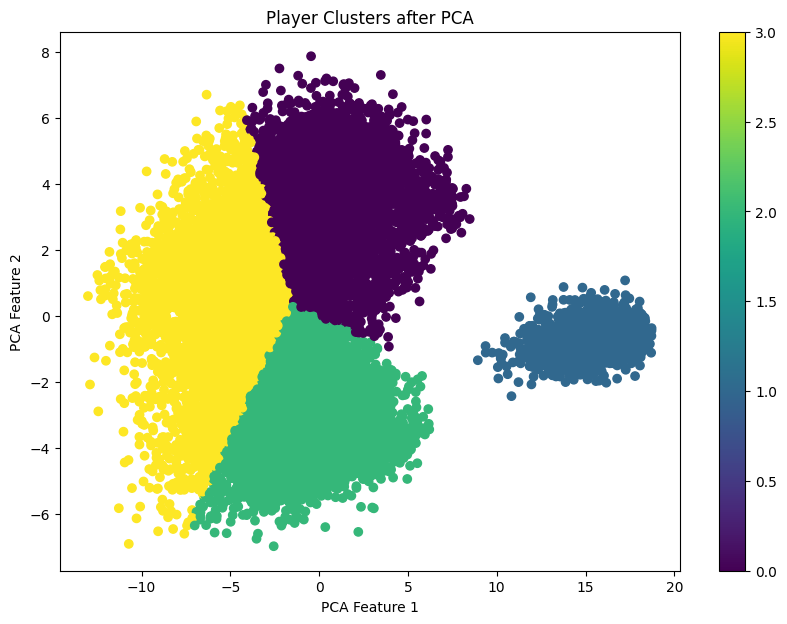

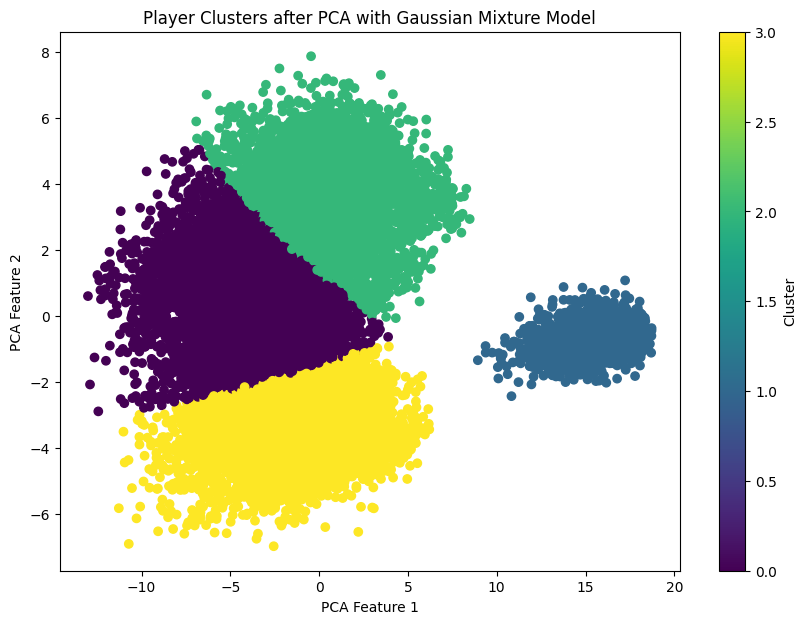

In [ ]:


# Adding cluster labels to the original dataframe
male_players_24['kmeans_cluster'] = kmeans.labels_

# Evaluating the clustering
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Player Clusters after PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

# Initialize the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the GMM model to the PCA-transformed data
gmm.fit(X_pca)

# Predict the cluster labels
gmm_labels = gmm.predict(X_pca)

# Adding cluster labels to the original dataframe
male_players_24['gmm_cluster'] = gmm_labels

# Plotting the GMM clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Player Clusters after PCA with Gaussian Mixture Model')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import rand_score

ari = adjusted_rand_score(male_players_24['broad_position'], gmm_labels)
ri = rand_score(male_players_24['broad_position'], gmm_labels)
print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Rand Index (RI): {ri}')

Adjusted Rand Index (ARI): 0.4018437134934892
Rand Index (RI): 0.7543975742502729


In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import rand_score

ari = adjusted_rand_score(male_players_24['broad_position'], kmeans.labels_)
ri = rand_score(male_players_24['broad_position'], kmeans.labels_)
print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Rand Index (RI): {ri}')

Adjusted Rand Index (ARI): 0.3608917237604377
Rand Index (RI): 0.7391925047552874
